<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Transfer_learning_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**DIFFERENT TYPES OF TRANSFER LEARNING:**
* **"As is"** - using an existing model without any changes
* **"Feature Extraction"** - use the prelearned patterns of an existing model and only change the output layer for your own use
* **"Fine Tuning"** - use a prelearned model for your project and "fine tune" the underlying layers or add new layers to get the desired output

###**FEATURE EXTRACTION TRANSFER LEARNING**

### **IMPORTING THE MODULES**

In [ ]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
import datetime

###**GETTING THE DATA**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-10-29 15:05:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  38.4MB/s    in 4.2s    

2021-10-29 15:05:10 (38.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
zf = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zf.extractall()
zf.close()

In [ ]:
for root,dir,files in os.walk("/content/10_food_classes_10_percent"):
  print(f'THERE ARE {len(dir)} SUBDIRECTORIES AND {len(files)} FILES IN THIS DIRECTORY')

THERE ARE 2 SUBDIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 10 SUBDIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 10 SUBDIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUBDIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0

###**CREATING TEST AND TRAIN DATA**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1/255.)
test = ImageDataGenerator(rescale=1/255.)
train_data = train.flow_from_directory("/content/10_food_classes_10_percent/train",
                                       class_mode = "categorical",
                                       target_size = (224,224))
test_data = test.flow_from_directory("/content/10_food_classes_10_percent/test",
                                       class_mode = "categorical",
                                       target_size = (224,224))
#training data is less than the testing data

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
train_data.num_classes

10

###**SETTING UP CALLBACKS**

In [ ]:
#creating the tensorboard callback
def tensorboard_callback(dirname,experimentname):
  log_dir = dirname + '/' + experimentname + datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  return tensorboard_callback

###**USING TENSORFLOW HUB TO USE A RESNET ARCHITECTURE BASED PRETRAINED MODEL**

In [ ]:
efficientnet = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
resnet = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [ ]:
import tensorflow_hub as hub
def feature_extraction_layer(model_url,num_classes=10):
  '''
  returns a model that has the feature extraction layer whose url is given in the input
  '''
  layer = hub.KerasLayer(model_url,
                         trainable = False,
                         name = "FEATURE_EXTRACTION_LAYER",
                         input_shape=(224,224,3))
  model = tf.keras.Sequential([
    layer,
    tf.keras.layers.Dense(num_classes,activation="softmax")
  ])
  return model

In [ ]:
resnet_model = feature_extraction_layer(resnet)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FEATURE_EXTRACTION_LAYER (Ke (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = "accuracy")

In [ ]:
history_resnet = resnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [tensorboard_callback(dirname="TENSORFLOWHUB",experimentname="RESNETV2_50")])

Epoch 1/5
24/24 [==============================] - 59s 1s/step - loss: 1.9281 - accuracy: 0.3507 - val_loss: 1.2070 - val_accuracy: 0.6152
Epoch 2/5
24/24 [==============================] - 22s 952ms/step - loss: 0.8879 - accuracy: 0.7400 - val_loss: 0.8589 - val_accuracy: 0.7200
Epoch 3/5
24/24 [==============================] - 22s 960ms/step - loss: 0.6068 - accuracy: 0.8133 - val_loss: 0.7556 - val_accuracy: 0.7528
Epoch 4/5
24/24 [==============================] - 22s 953ms/step - loss: 0.4675 - accuracy: 0.8707 - val_loss: 0.7079 - val_accuracy: 0.7624
Epoch 5/5
24/24 [==============================] - 22s 955ms/step - loss: 0.3758 - accuracy: 0.9053 - val_loss: 0.7041 - val_accuracy: 0.7736


###**EVALUATING OUR RESNET MODEL**

In [ ]:
resnet_model.evaluate(test_data)

79/79 [==============================] - 17s 218ms/step - loss: 0.7041 - accuracy: 0.7736


[0.7041433453559875, 0.7735999822616577]

In [ ]:
#OUR MODEL HAS ALREADY ACHIEVED 76% ACCURACY ON THE TEST DATA AND THAT TOO ONLY IN 5 EPOCHS
def plot_curves(history):
  train_loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  train_accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  plt.plot(epochs,train_loss,val_loss)
  plt.grid(True)
  plt.title("TRAINING LOSS VS VALIDATION LOSS")
  plt.legend(["TRAINING LOSS","VALIDATION LOSS"])
  plt.figure()
  plt.plot(epochs,train_accuracy,val_accuracy)
  plt.grid(True)
  plt.title("TRAINING ACCURACY VS VALIDATION ACCURACY")
  plt.legend(["TRAINING ACCURACY","VALIDATION ACCURACY"])

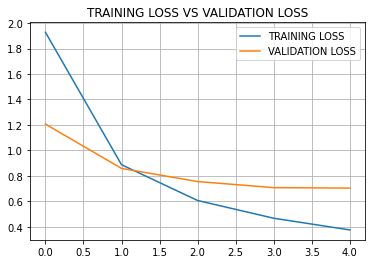

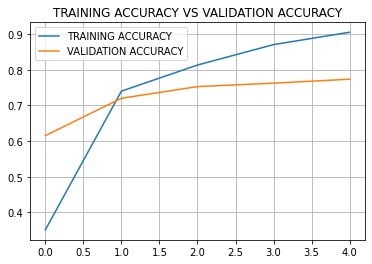

In [ ]:
plot_curves(history_resnet)

###**USING TENSORFLOW HUB TO USE A EFFICIENTNET ARCHITECTURE BASED PRETRAINED MODEL**

In [ ]:
efficientnet_model = feature_extraction_layer(efficientnet)

In [ ]:
efficientnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics = "accuracy")

In [ ]:
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs = 5,
                                              steps_per_epoch = len(train_data),
                                              validation_data = test_data,
                                              validation_steps = len(test_data),
                                              callbacks = [tensorboard_callback("TENSORFLOWHUB","EFFICIENTNETB0")])

Epoch 1/5
24/24 [==============================] - 33s 1000ms/step - loss: 1.8503 - accuracy: 0.4293 - val_loss: 1.3040 - val_accuracy: 0.7216
Epoch 2/5
24/24 [==============================] - 19s 817ms/step - loss: 1.0486 - accuracy: 0.7667 - val_loss: 0.8710 - val_accuracy: 0.8152
Epoch 3/5
24/24 [==============================] - 19s 818ms/step - loss: 0.7525 - accuracy: 0.8293 - val_loss: 0.7019 - val_accuracy: 0.8464
Epoch 4/5
24/24 [==============================] - 19s 814ms/step - loss: 0.6010 - accuracy: 0.8640 - val_loss: 0.6119 - val_accuracy: 0.8572
Epoch 5/5
24/24 [==============================] - 19s 814ms/step - loss: 0.5070 - accuracy: 0.8947 - val_loss: 0.5579 - val_accuracy: 0.8612


###**EVALUATING OUR EFFICIENTNET MODEL**

In [ ]:
efficientnet_model.evaluate(test_data)

79/79 [==============================] - 15s 187ms/step - loss: 0.5579 - accuracy: 0.8612


[0.5579168200492859, 0.8611999750137329]

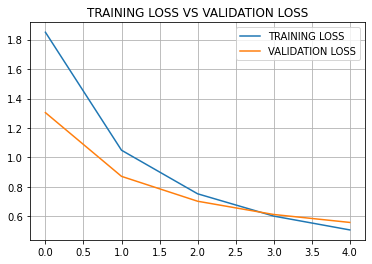

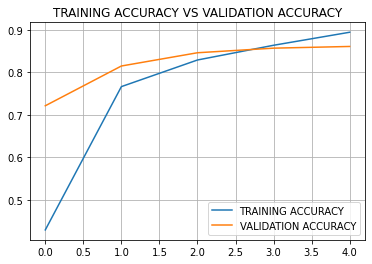

In [ ]:
plot_curves(efficientnet_history)

###**COMPARING OUR MODELS USING TENSORBOARD**

NOTE: WHEN EXPERIMENTS ARE UPLPOADED TO TensorBoard.dev TEY ARE PUBLIC AND CAN BE SEEN BY EVERYONE

In [ ]:
!tensorboard dev upload --logdir ./TENSORFLOWHUB/ \
--name "RESNETV2_50 VS EFFICIENTB0" \
--description "USING TENSORBOARD TO COMPARE THE PEERFORMANCES OF OUR TENSORFLOW HUB FEATURE EXTRACTION MODELS" \
--one_shot

2021-10-29 15:14:05.656234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 15:14:05.679239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 15:14:05.679743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./TENSORFLOWHUB/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy

In [ ]:
!tensorboard dev list

2021-10-29 15:17:58.646694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 15:17:58.655253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 15:17:58.655795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/oD2aJ139SpmOtocwyTokNg/
	Name                 RESNETV2_50 VS EFFICIENTB0
	Description          USING TENSORBOARD TO COMPARE THE PEERFORMANCES OF OUR TENSORFLOW HUB FEATURE EXTRACTION MODELS
	Id                   oD2aJ139SpmOtocwyTokNg
	Created              2021-10-29 15:14:41 (3 minutes ago)
	Updated    